## **LightGBM Classifier**

- LightGBM (Light Gradient Boosting Machine) is an efficient and powerful framework for gradient boosting developed by Microsoft. It is designed to be highly efficient, flexible, and capable of handling large-scale data with high performance.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import lightgbm as lgb

**Data**

In [2]:
# Path 
file_path = 'data.csv'

# read the data
data = pd.read_csv(file_path)
if 'Unnamed: 0' in data.columns: 
    data.drop('Unnamed: 0', axis=1, inplace=True)

**Model**

In [3]:
# Separate the features and the target variable
X = data.iloc[:, :-1]  # last column is the target
y = data.iloc[:, -1]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Shapes 
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (39617, 9)
X_test shape: (9905, 9)
y_train shape: (39617,)
y_test shape: (9905,)


In [6]:
# Define the LightGBM model with custom hyperparameters
model = lgb.LGBMClassifier(
    n_estimators=300,      # Number of boosting rounds
    learning_rate=0.1,     # Step size shrinkage used to prevent overfitting
    max_depth=-1,          # Maximum tree depth for base learners, -1 means no limit
    random_state=42        # Random state for reproducibility
)

In [7]:
# Measure the training time
start_time = time.time()

print("Starting training...")

# Train the model
model.fit(X_train, y_train)

# Measure the end time
end_time = time.time()

print(f"Training completed in {end_time - start_time:.2f} seconds")

Starting training...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 39617, number of used features: 9
[LightGBM] [Info] Start training from score -1.605081
[LightGBM] [Info] Start training from score -1.814713
[LightGBM] [Info] Start training from score -2.295467
[LightGBM] [Info] Start training from score -3.194366
[LightGBM] [Info] Start training from score -3.222467
[LightGBM] [Info] Start training from score -3.499440
[LightGBM] [Info] Start training from score -2.788491
[LightGBM] [Info] Start training from score -3.210505
[LightGBM] [Info] Start training from score -2.509877
[LightGBM] [Info] Start training from score -3.466569
[LightGBM] [Info] Start training from score -3.320186
[LightGBM] [Info] Start training from score -1.748897
Training completed in 7.71 seconds


In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.93336698637052


In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", conf_matrix)

Confusion Matrix: [[1969   33   12    2    3    1    5    0    7    1    2    7]
 [  13 1421    1   16   14    2    3   14   52    2    5    4]
 [   4   30  963    3    2    1    0    0    1    0    2    4]
 [   1   17    0  319   12    0    1    5   19    1    1    0]
 [   1   34    0   10  344    0    3    8   18    1    2    0]
 [   1    0    0    1    0  284    9    0    0    3    5    0]
 [   0    8    0    0    1    6  543    4    1    0    0    0]
 [   1   15    0    8    8    1    2  352   10    3    2    0]
 [   2   57    0   10   18    0    1    8  677    2    4    1]
 [   2    4    0    3    2    2    2    2    2  241    3    0]
 [   1    7    0    1    5    4    2    2    6    8  332    0]
 [   3   14    2    0    1    0    1    0    8    0    1 1800]]


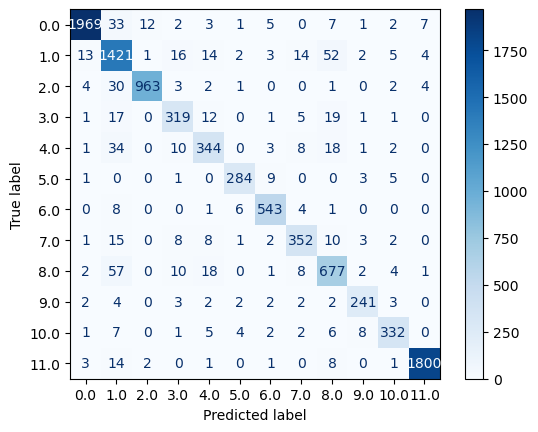

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Save the model**

In [12]:
# Save the model 
import joblib
import os

# Replace with the path to your desired folder
folder_path = "saved_models"
model_filename = "lightGBM.pkl"
full_path = os.path.join(folder_path, model_filename)

# Ensure the directory exists
os.makedirs(folder_path, exist_ok=True)

# Save the trained SVM model
joblib.dump(model, full_path)

print(f"Model saved at {full_path}")

Model saved at saved_models\lightGBM.pkl
